In [11]:
import mpmath as mp
from mpmath import *

# Plus basses sont les valeurs de phi0 qu'on veut explorer, plus haut on met dps, et plus on fine tune alpha_max
mp.dps = 500
mp.prec = 166

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 10
def define_plot_resolution():
    """
    This function allow to define the resolution of a matplotlib plot on a way
    wich is device independent. Put this before saving any of your plot to get
    homogeneous resolution.
    """

    fig = plt.gcf()  # get current figure

    DPI = fig.get_dpi()
#     fig.set_size_inches(1920.0 / float(DPI), 1080.0 / float(DPI))
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(20)
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.yaxis.offsetText.set_fontsize(20)
    ax.xaxis.offsetText.set_fontsize(20)
    return
import numpy as np
import pandas as pd
import time
from scipy.integrate import odeint

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)
Pstar = mp.mpf('2.2030e-9')

In [12]:
def Vtree(phi, mphi, A6, lambda6):
    return 0.5*mphi**2*phi**2-A6*lambda6/(6*Mp**3)*phi**6+lambda6**2*phi**10/Mp**6

def dVtreedphi(phi, mphi, A6, lambda6):
    return mphi**2*phi-A6*lambda6/(Mp**3)*phi**5+10*lambda6**2*phi**9/Mp**6

def phidot_slowroll(phi, mphi, A6, lambda6):
    return -Mp*dVtreedphi(phi, mphi, A6, lambda6)/(np.sqrt(3)*np.sqrt(Vtree(phi, mphi, A6, lambda6)))
    

def traj(y, t, mphi, A6, lambda6):
    phi, phidot = y
    dydt = [phidot, -(dVtreedphi(phi, mphi, A6, lambda6)+3**0.5/Mp*phidot*np.sqrt(phidot**2/2+Vtree(phi, mphi, A6, lambda6)))]
    return dydt

# Phase space

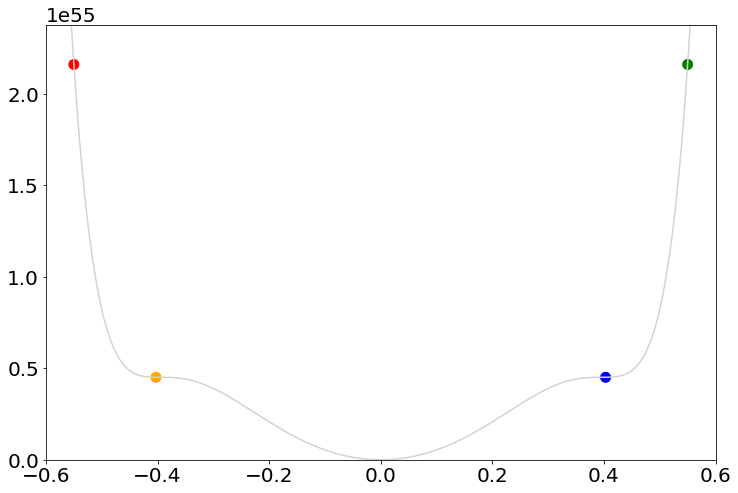

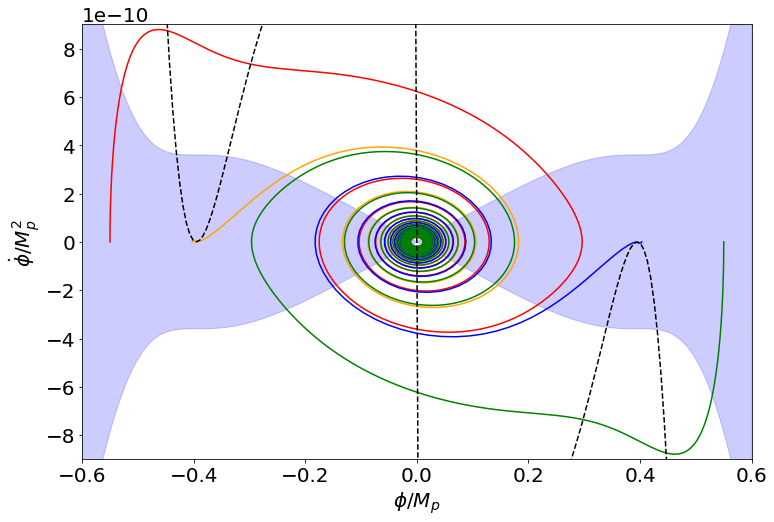

In [14]:
mphi = 4285661129.856315476257436204924610602145286935627
lambda6 = 0.00000002291199873463820971135881534315253567640122321974
A6 = 27104899996.9236774536602006784099571257654061477
phi0 = 959523587182083133.6547556370011976922913989279358 

phi_start_list = np.array([-0.55, -1.02*phi0/Mp, 1.02*phi0/Mp, 0.55])
colorlist = ['red', 'orange', 'blue', 'green']

plt.figure()
phi_list = np.linspace(float(-0.6*Mp), float(0.6*Mp), 200)
plt.xlim(-0.6,0.6)
plt.ylim(0,float(Vtree(phi_start_list[0]*Mp, mphi, A6, lambda6)*1.1))
plt.plot(phi_list/Mp, Vtree(phi_list, mphi, A6, lambda6), 'lightgray')
plt.scatter(phi_start_list, Vtree(phi_start_list*Mp, mphi, A6, lambda6), c=colorlist, s=100)
define_plot_resolution()

plt.figure()
t = np.logspace(-10.5, -7.5, 1000)
plt.plot([],[],alpha=0, label=r'$\frac{\phi}{M_p}|_{initial}$')
for i in [0]:
    for jj,j in enumerate(phi_start_list):
        y0 = [j*Mp, i]
        sol = odeint(traj, y0, t, args=(mphi, A6, lambda6))
        plt.plot(sol[:, 0]/Mp,sol[:, 1]/(Mp**2), color=colorlist[jj], label=str("%.2f"%j))
# phi_listt = np.linspace(-0.57, 0.57, 100)
plt.ylim(-9e-10,9e-10)
plt.fill_between(np.array(phi_list/Mp, dtype=float), np.array(-np.sqrt(Vtree(phi_list, mphi, A6, lambda6))/(Mp**2), dtype=float), np.array(np.sqrt(Vtree(phi_list, mphi, A6, lambda6))/(Mp**2), dtype=float), color='blue', alpha=0.2)
plt.plot(phi_list/Mp, phidot_slowroll(phi_list, mphi, A6, lambda6)/(Mp**2), linestyle='--', color='black')
# plt.legend(fontsize=22)
plt.xlim(-0.6,0.6)
plt.xlabel(r'$\phi/M_p$')
plt.ylabel(r'$\dot\phi/M_p^2$')
define_plot_resolution()


# Trajectory, Hubble factor, exact number of efolds for phi_i >> phi_0 (phi^10 slow-roll attractor)

[]

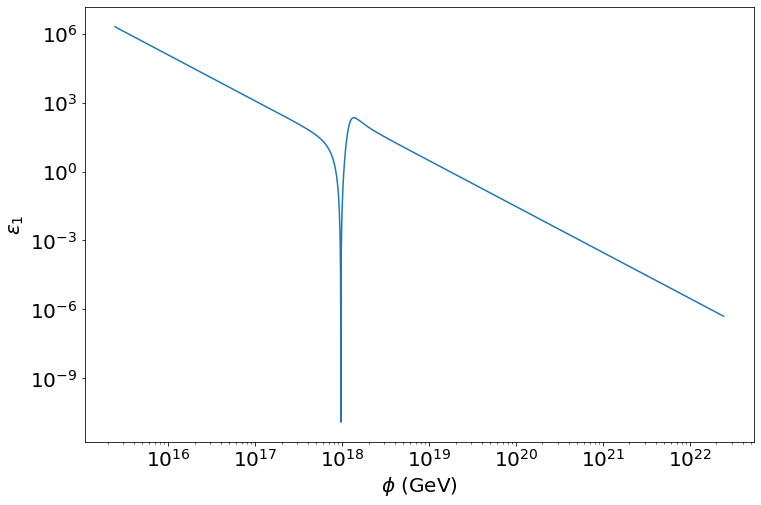

In [19]:
import numpy as np
def eps1(phi, mphi, A6, lambda6):
    return Mp**2/2*(dVtreedphi(phi, mphi, A6, lambda6)/Vtree(phi, mphi, A6, lambda6))**2
phi_list = np.logspace( np.log10(float(Mp/1000)), np.log10(float(10000*Mp)), 10000)
plt.plot(phi_list, eps1(phi_list, mphi, A6, lambda6))
define_plot_resolution()
plt.xlabel(r'$\phi$ (GeV)')
plt.ylabel(r'$\epsilon_1$')
plt.loglog()

Another slow-roll zone at phi > 7 Mp

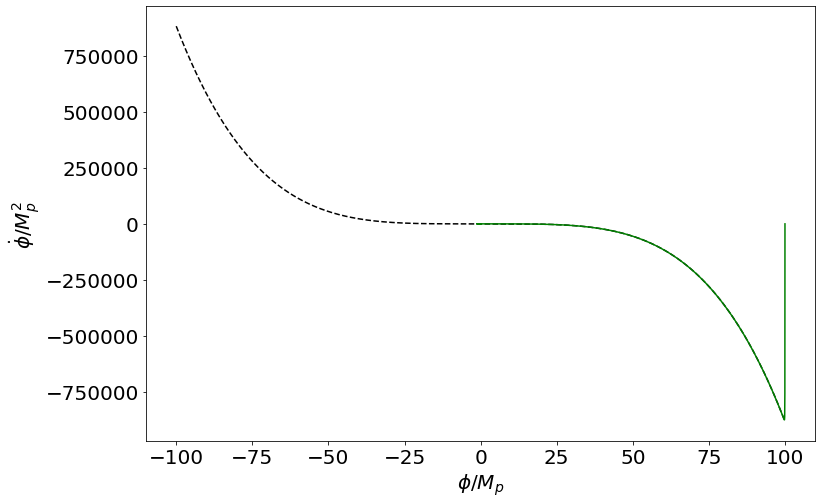

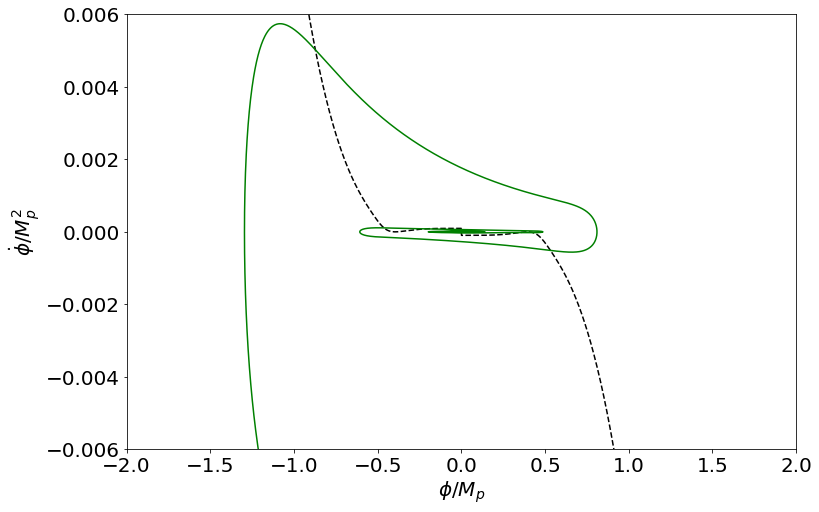

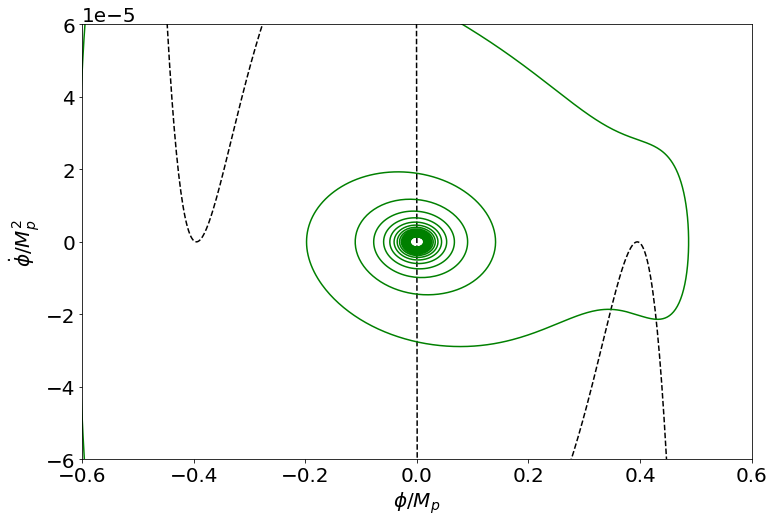

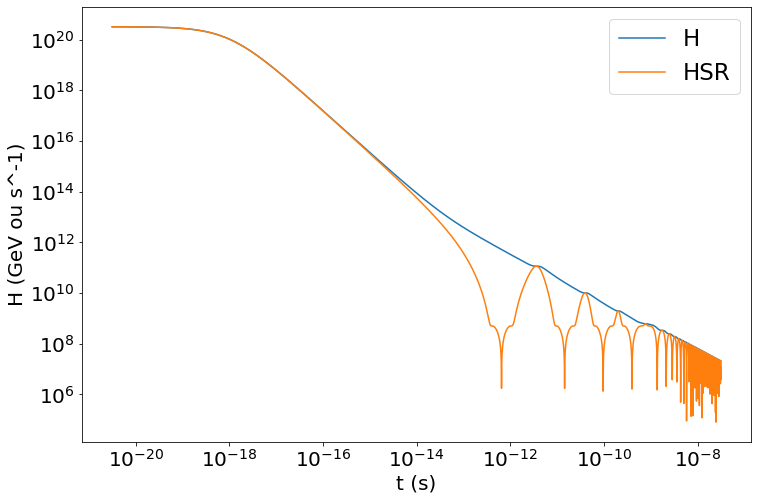

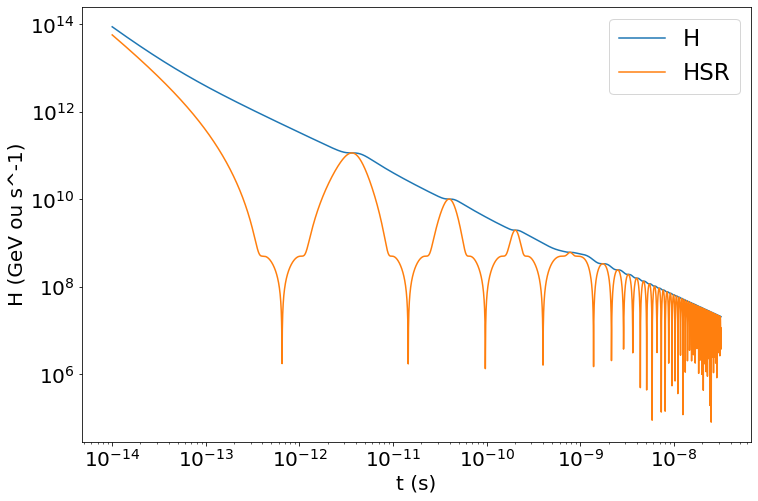

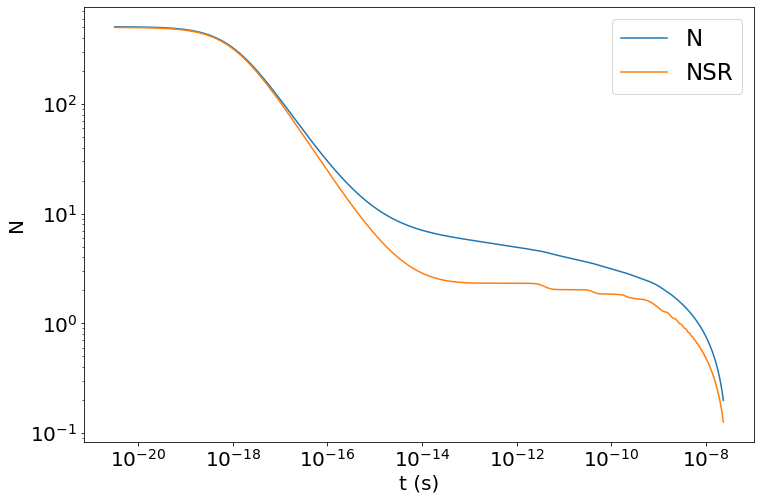

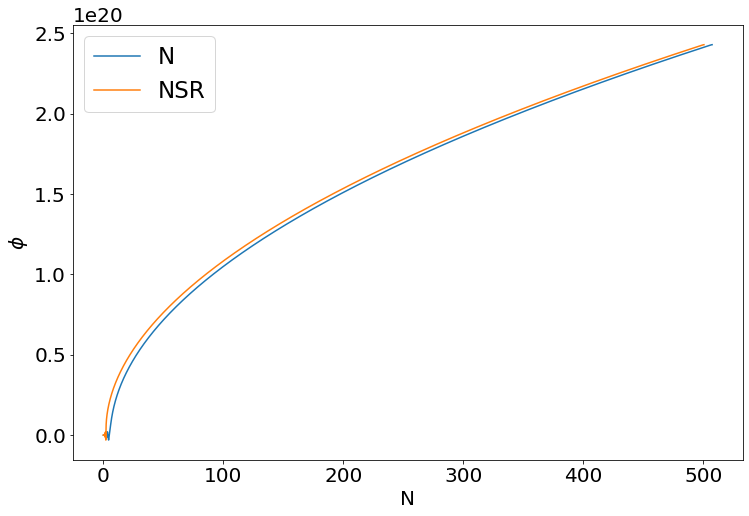

In [15]:
## TRAJECTORY COMING FROM PHI10 SLOW-ROLL ##

phi_list = np.linspace(float(-100*Mp), float(100*Mp), 100000)
t = np.logspace(-20.5, -7.5, 10000)
y0 = [100*Mp, 0]
sol = odeint(traj, y0, t, args=(mphi, A6, lambda6))
        
slowroll_list = phidot_slowroll(phi_list, mphi, A6, lambda6)/(0.000015*Mp**2)
   
plt.figure()
plt.plot(phi_list/Mp, slowroll_list, linestyle='--', color='black')
plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2), color=colorlist[jj], label=str("%.2f"%j))
plt.xlabel(r'$\phi/M_p$')
plt.ylabel(r'$\dot\phi/M_p^2$')
define_plot_resolution()

plt.figure()
plt.plot(phi_list/Mp, slowroll_list, linestyle='--', color='black')
plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2), color=colorlist[jj], label=str("%.2f"%j))
plt.xlim(-2,2)
plt.ylim(-6e-3,6e-3)
plt.xlabel(r'$\phi/M_p$')
plt.ylabel(r'$\dot\phi/M_p^2$')
define_plot_resolution()

plt.figure()
plt.plot(phi_list/Mp,slowroll_list , linestyle='--', color='black')
plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2), color=colorlist[jj], label=str("%.2f"%j))
plt.ylim(-6e-5,6e-5)
plt.xlim(-0.6,0.6)
plt.xlabel(r'$\phi/M_p$')
plt.ylabel(r'$\dot\phi/M_p^2$')
define_plot_resolution()

H = np.array([float(x) for x in np.sqrt(1/(3*Mp**2)*((sol[:, 1])**2/2+Vtree(sol[:, 0],mphi,A6, lambda6)))])
HSR = np.array([float(x) for x in np.sqrt(1/(3*Mp**2)*(Vtree(sol[:, 0],mphi,A6, lambda6)))])


plt.figure()
plt.plot(t, H,label='H')
plt.plot(t, HSR,label='HSR')
plt.legend(fontsize=23)
plt.loglog()
plt.ylabel('H (GeV ou s^-1)')
plt.xlabel('t (s)')
define_plot_resolution()

plt.figure()
plt.plot(t[5000:], H[5000:],label='H')
plt.plot(t[5000:], HSR[5000:],label='HSR')
plt.legend(fontsize=23)
plt.loglog()
plt.ylabel('H (GeV ou s^-1)')
plt.xlabel('t (s)')
define_plot_resolution()

N_list = [sum((H[i+1:]+H[i:-1])/2*(-t[i:-1]+t[i+1:])) for i in range(len(t))]
N_listSR = [sum((HSR[i+1:]+HSR[i:-1])/2*(-t[i:-1]+t[i+1:])) for i in range(len(t))]

plt.figure()
plt.plot(t[:-100], N_list[:-100], label='N')
plt.plot(t[:-100], N_listSR[:-100], label='NSR')
plt.legend(fontsize=23)
plt.ylabel('N')
plt.xlabel('t (s)')
define_plot_resolution()
plt.loglog()

plt.figure()
plt.plot(N_list[:-100], sol[:, 0][:-100], label='N')
plt.plot(N_listSR[:-100], sol[:, 0][:-100], label='NSR')
plt.legend(fontsize=23)
plt.ylabel(r'$\phi$')
plt.xlabel('N')
define_plot_resolution()

# Trajectory, Hubble factor, exact number of efolds for phi_i around phi_0

In [16]:
def plott(start):
    plt.figure()
    phi_list = np.linspace(float(-0.6*Mp), float(0.6*Mp), 20000)
    t = np.logspace(-10, -6.1, 20000)
    for i in [0]:
        for jj,j in enumerate(phi_start_list):
            y0 = [start*phi0, 0]#phidot_slowroll(1.001*phi0, mphi, A6, lambda6)]
            sol = odeint(traj, y0, t, args=(mphi, A6, lambda6))


    slowroll_list = phidot_slowroll(phi_list, mphi, A6, lambda6)/(0.000015*Mp**2)

    # plt.figure()
    # plt.plot(phi_list/Mp, slowroll_list, linestyle='--', color='black')
    # plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2), color=colorlist[jj], label=str("%.2f"%j))
    # define_plot_resolution()

    # plt.figure()
    # plt.plot(phi_list/Mp, slowroll_list, linestyle='--', color='black')
    # plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2), color=colorlist[jj], label=str("%.2f"%j))
    # plt.xlim(-3,3)
    # plt.ylim(-6e-2,6e-2)
    # define_plot_resolution()

    plt.figure()
    plt.plot(phi_list/Mp,slowroll_list , linestyle='--', color='black')
    plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2), color=colorlist[jj], label=str("%.2f"%j))
    plt.ylim(-6e-5,6e-5)
    plt.xlim(-0.6,0.6)
    plt.xlabel(r'$\phi/M_p$')
    plt.ylabel(r'$\dot\phi/M_p^2$')
    define_plot_resolution()

    plt.figure()
    plt.plot(phi_list/Mp,slowroll_list , linestyle='--', color='black')
    plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2), color=colorlist[jj], label=str("%.2f"%j))
    plt.xlim(phi0/float(Mp)*0.9985,phi0/float(Mp)*1.0015)
    plt.ylim(-0.5e-8,1e-9)
    plt.xlabel(r'$\phi/M_p$')
    plt.ylabel(r'$\dot\phi/M_p^2$')
    define_plot_resolution()


    H = np.array([float(x) for x in np.sqrt(1/(3*Mp**2)*((sol[:, 1])**2/2+Vtree(sol[:, 0],mphi,A6, lambda6)))])
    HSR = np.array([float(x) for x in np.sqrt(1/(3*Mp**2)*(Vtree(sol[:, 0],mphi,A6, lambda6)))])


    plt.figure()
    plt.plot(t, H,label='H')
    plt.plot(t, HSR,label='HSR')
    plt.legend(fontsize=23)
    plt.loglog()
    plt.ylabel('H (GeV ou s^-1)')
    plt.xlabel('t (s)')
    define_plot_resolution()

    # plt.figure()
    # plt.plot(t[5000:], H[5000:],label='H')
    # plt.plot(t[5000:], HSR[5000:],label='HSR')
    # plt.legend(fontsize=23)
    # plt.loglog()
    # plt.ylabel('H (GeV ou s^-1)')
    # plt.xlabel('t (s)')
    # define_plot_resolution()

    plt.figure()
    N_list = [sum((H[i+1:]+H[i:-1])/2*(-t[i:-1]+t[i+1:])) for i in range(len(t))]
    N_listSR = [sum((HSR[i+1:]+HSR[i:-1])/2*(-t[i:-1]+t[i+1:])) for i in range(len(t))]
    plt.plot(t[:-100], N_list[:-100], label='N')
    plt.plot(t[:-100], N_listSR[:-100], label='NSR')
    plt.legend(fontsize=23)
    plt.ylabel('N')
    plt.xlabel('t (s)')
    define_plot_resolution()
    plt.loglog()

    plt.figure()
    plt.plot(N_list[:-100], sol[:, 0][:-100], label='N')
    plt.plot(N_listSR[:-100], sol[:, 0][:-100], label='NSR')
    plt.legend(fontsize=23)
    plt.ylabel(r'$\phi$')
    plt.xlabel('N')
    define_plot_resolution()
    
def plottt(start):
    plt.figure()
    t = np.logspace(-9, -6.1, 10000)
    y0 = [start*phi0, 0]
    sol = odeint(traj, y0, t, args=(mphi, A6, lambda6))
    H = np.array([float(x) for x in np.sqrt(1/(3*Mp**2)*((sol[:, 1])**2/2+Vtree(sol[:, 0],mphi,A6, lambda6)))])
    N_list = [sum((H[i+1:]+H[i:-1])/2*(-t[i:-1]+t[i+1:])) for i in range(len(t))]
    plt.plot(N_list[:-100], sol[:, 0][:-100])
    plt.ylabel(r'$\phi$')
    plt.xlabel('N')
    define_plot_resolution()

def total_efolds(start):
    t = np.logspace(-9, -6.1, 10000)
    y0 = [start*phi0, 0]
    sol = odeint(traj, y0, t, args=(mphi, A6, lambda6))
    H = np.array([float(x) for x in np.sqrt(1/(3*Mp**2)*((sol[:, 1])**2/2+Vtree(sol[:, 0],mphi,A6, lambda6)))])
    N_tot = sum((H[1:]+H[:-1])/2*(-t[:-1]+t[1:]))
    return N_tot

def plotttt(start, color):
    t = np.logspace(-9, -6.1, 10000)
    y0 = [start*phi0, 0]
    sol = odeint(traj, y0, t, args=(mphi, A6, lambda6))
    H = np.array([float(x) for x in np.sqrt(1/(3*Mp**2)*((sol[:, 1])**2/2+Vtree(sol[:, 0],mphi,A6, lambda6)))])
    N_tot = sum((H[1:]+H[:-1])/2*(-t[:-1]+t[1:]))
    plt.plot(sol[:, 0]/phi0,sol[:, 1]/(0.000015*Mp**2), label = r'$\phi_i = '+str(start)+r'$*\phi_0$', color=color)
    print(str(round(N_tot,2)),sol[:, 0][0]/phi0, sol[:, 1][0]/(0.000015*Mp**2))
    plt.text(sol[:, 0][0]/phi0, -0.15e-8, ' '+str(round(N_tot,2)), color= color, fontsize = 16)


<Figure size 1152x720 with 0 Axes>

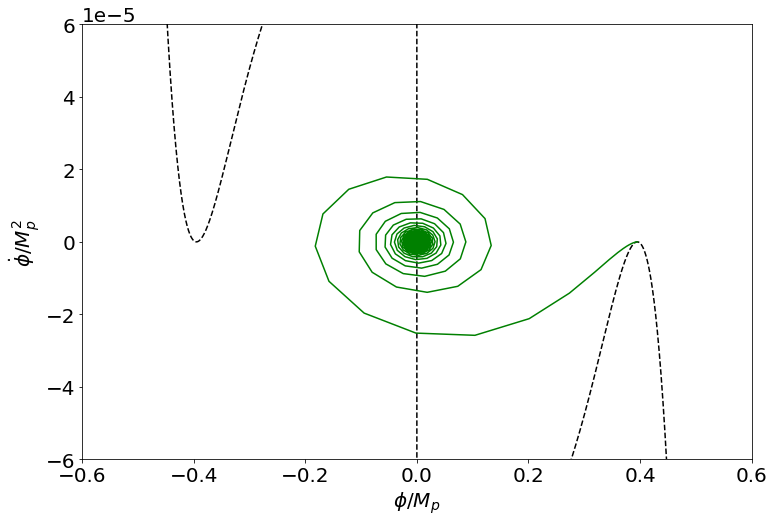

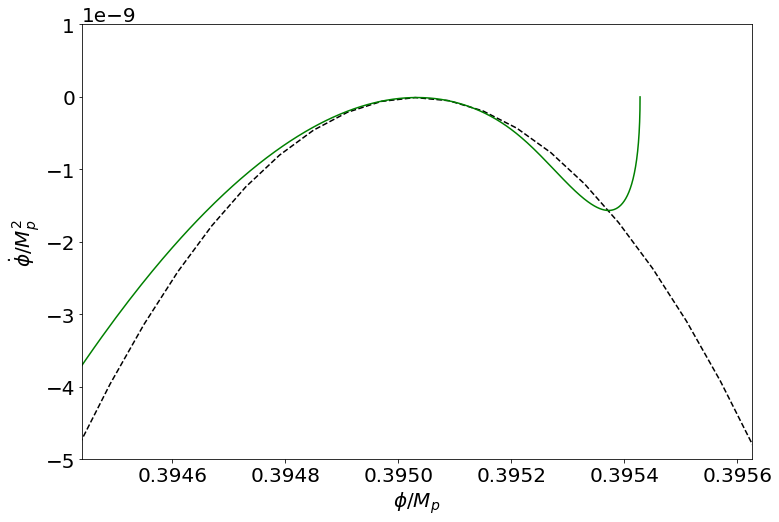

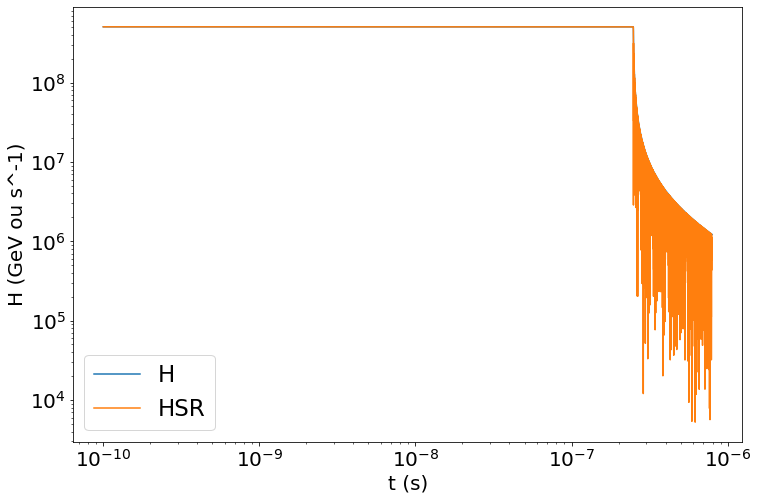

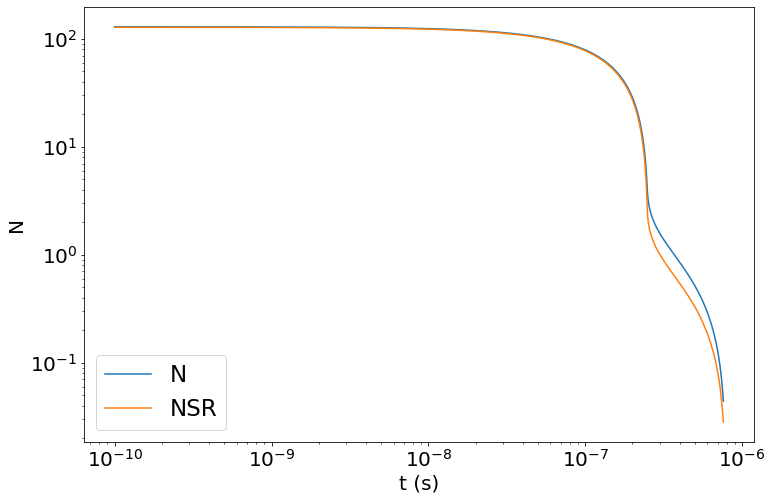

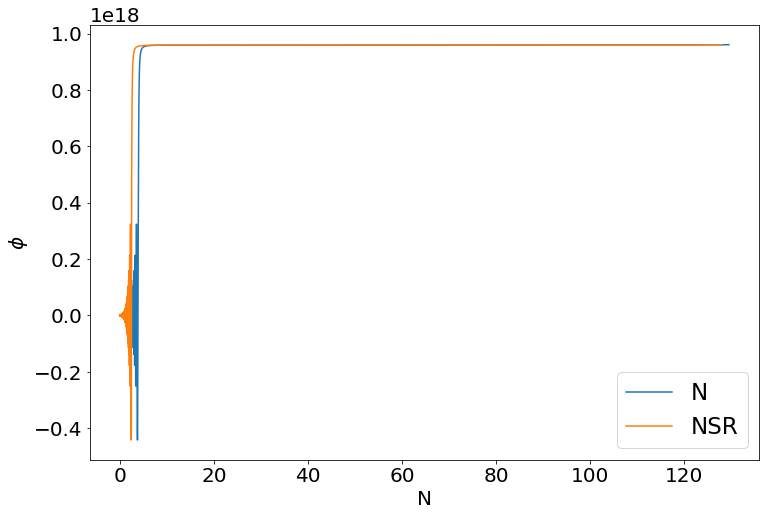

In [39]:
start = 1.001
plott(start)

<Figure size 1152x720 with 0 Axes>

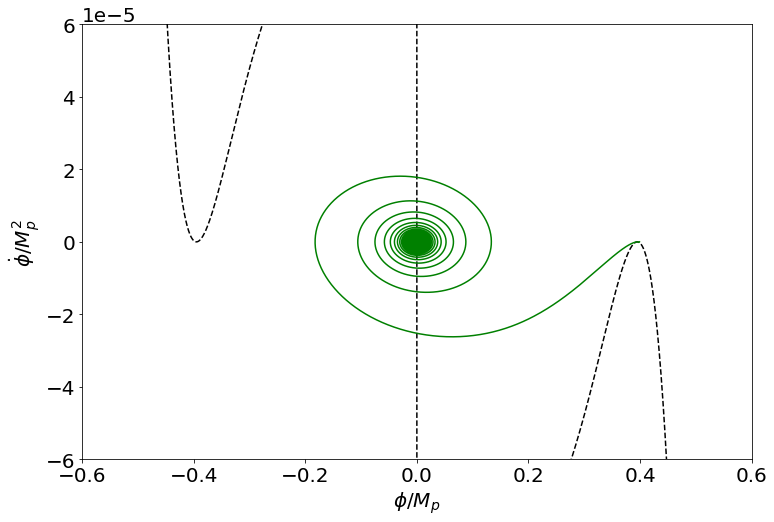

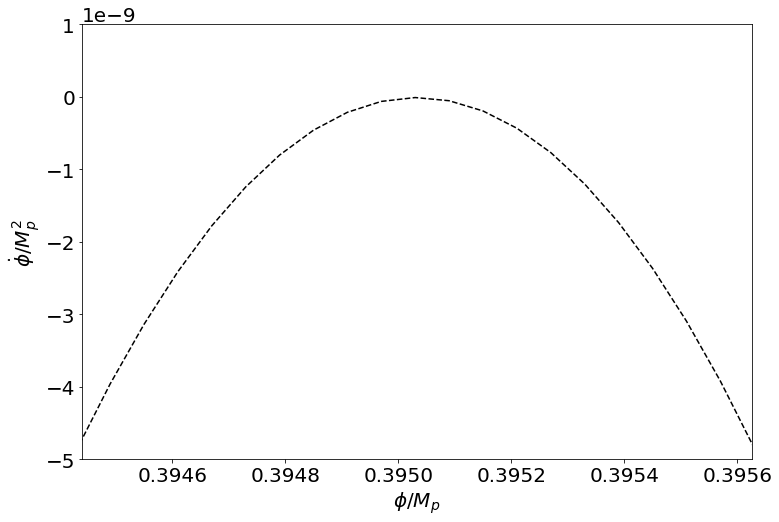

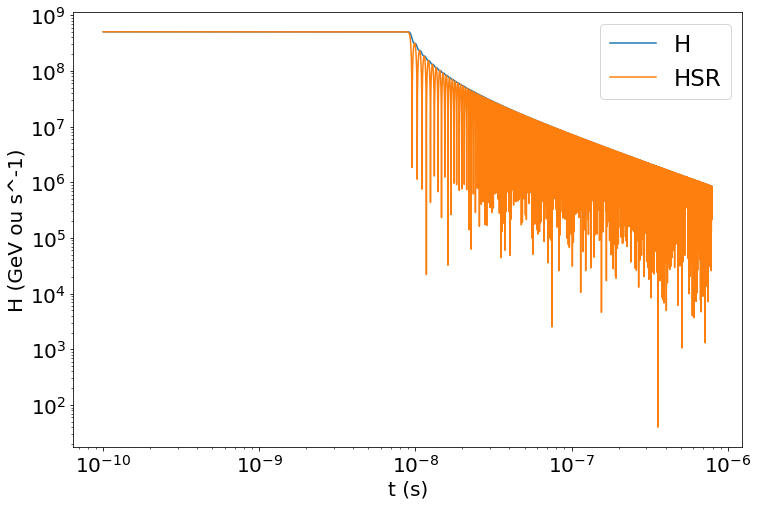

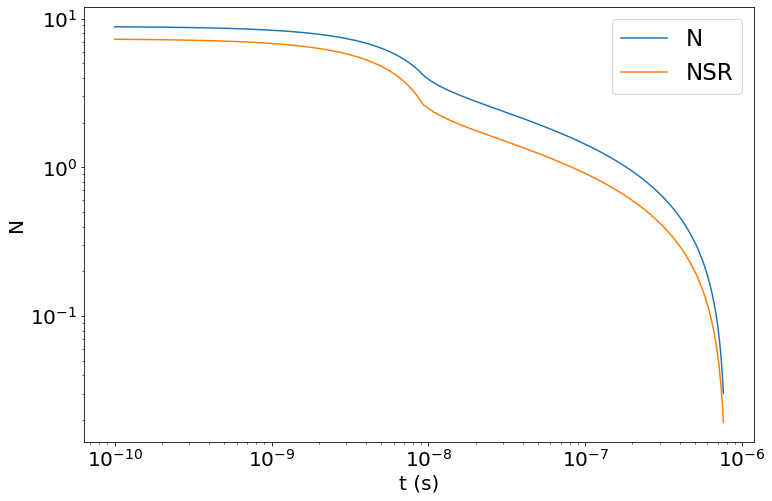

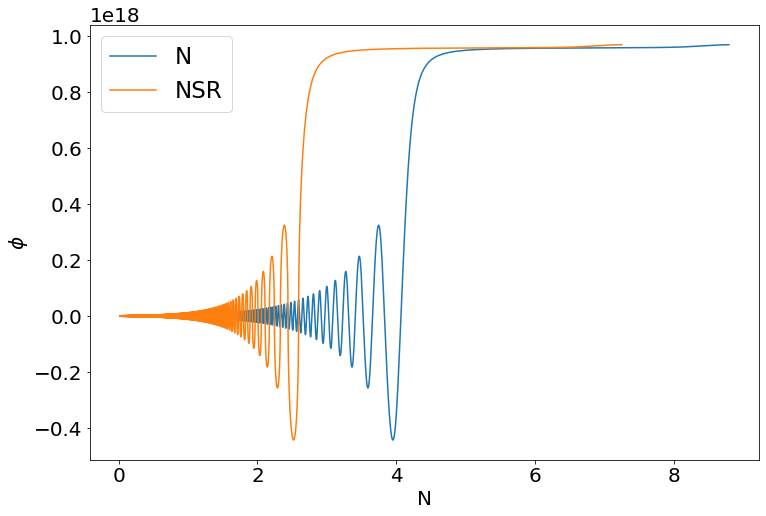

In [17]:
start = 1.01
plott(start)

8.8 1.01 0.0
16.87 1.0075 0.0
127.33 1.005 0.0
130.06 1.0025 0.0
6.53 0.9975 0.0
5.7 0.995 0.0


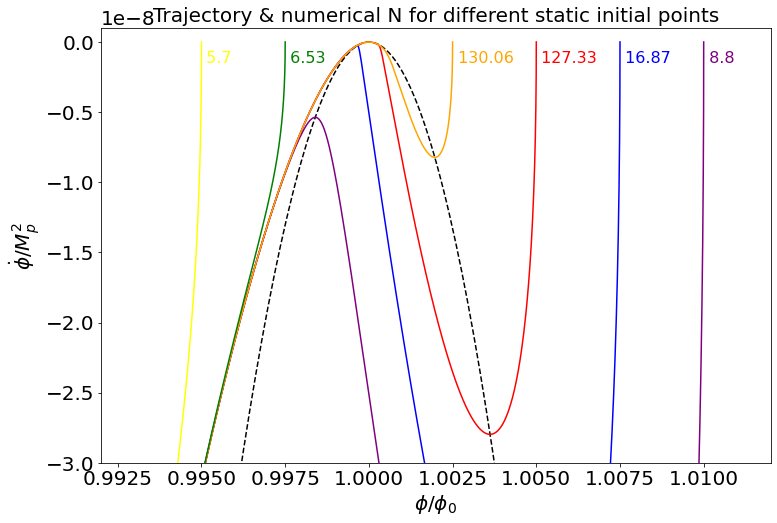

In [114]:
plt.figure()
phi_listt=np.linspace(0.994,1.012,200)
slowroll_listt = phidot_slowroll(phi_listt*phi0, mphi, A6, lambda6)/(0.000015*Mp**2)
plt.plot(phi_listt,slowroll_listt , linestyle='--', color='black')
color_list = ['purple','blue', 'red', 'orange', 'green', 'yellow']
plt.title('Trajectory & numerical N for different static initial points', fontsize = 20)
for i, start in enumerate([1.01, 1.0075, 1.005,1.0025,0.9975,0.995]):
    plotttt(start, color_list[i])
plt.ylim(-3e-8,1e-9)
plt.xlim(0.992,1.012)
plt.xlabel(r'$\phi/\phi_0$')
plt.ylabel(r'$\dot\phi/M_p^2$')
define_plot_resolution()

In [22]:
x_list = 1+np.logspace(-5,0, 101)
x_list_sym = np.concatenate((np.flip(1-np.logspace(-7,0, 71)),1+np.logspace(-7,0, 71)))

y_list_sym = []
for x in x_list_sym:
    N = total_efolds(x)
    print(end=str(round(N,3))+', ')
    y_list_sym.append(N)

# y_list = [77.099, 77.837, 78.66, 79.575, 80.59, 81.714, 82.954, 84.316, 85.806, 87.427, 89.177, 91.054, 93.048, 95.144, 97.324, 99.563, 101.833, 104.105, 106.348, 108.534, 110.636, 112.635, 114.515, 116.265, 117.881, 119.362, 120.71, 121.929, 123.026, 124.01, 124.887, 125.667, 126.358, 126.968, 127.503, 127.972, 128.381, 128.735, 129.039, 129.298, 129.517, 129.698, 129.844, 129.958, 130.041, 130.094, 130.116, 130.106, 130.059, 129.967, 129.816, 129.578, 129.197, 128.548, 127.291, 124.101, 106.958, 24.977, 13.436, 10.298, 8.796, 7.894, 7.282, 6.834, 6.489, 6.213, 5.987, 5.796, 5.634, 5.493, 5.37, 5.261, 5.164, 5.077, 4.999, 4.927, 4.862, 4.802, 4.748, 4.697, 4.651, 4.608, 4.569, 4.535, 4.505, 4.482, 4.466, 4.462, 4.471, 4.499, 4.551, 4.633, 4.77, 5.267, 5.036, 5.027, 5.086, 5.195, 5.377, 5.793, 5.664]

0.0, 3.425, 3.813, 4.01, 4.13, 4.209, 4.266, 4.311, 4.351, 4.389, 4.428, 4.47, 4.516, 4.567, 4.625, 4.69, 4.764, 4.848, 4.944, 5.054, 5.181, 5.328, 5.498, 5.696, 5.928, 6.201, 6.523, 6.906, 7.364, 7.913, 8.576, 9.378, 10.355, 11.546, 13.0, 14.775, 16.934, 19.54, 22.644, 26.269, 30.383, 34.875, 39.56, 44.204, 48.581, 52.524, 55.945, 58.831, 61.217, 63.161, 64.731, 65.992, 67.0, 67.803, 68.444, 68.953, 69.358, 69.68, 69.935, 70.138, 70.3, 70.428, 70.53, 70.611, 70.675, 70.726, 70.767, 70.799, 70.824, 70.845, 70.861, 70.985, 71.002, 71.022, 71.047, 71.08, 71.12, 71.171, 71.235, 71.316, 71.418, 71.546, 71.708, 71.911, 72.166, 72.487, 72.892, 73.4, 74.039, 74.84, 75.844, 77.099, 78.66, 80.59, 82.954, 85.806, 89.177, 93.048, 97.324, 101.833, 106.348, 110.636, 114.515, 117.881, 120.71, 123.026, 124.887, 126.358, 127.503, 128.381, 129.039, 129.517, 129.844, 130.041, 130.116, 130.059, 129.816, 129.197, 127.291, 106.958, 13.436, 8.796, 7.282, 6.489, 5.987, 5.634, 5.37, 5.164, 4.999, 4.862, 4.748

In [ ]:
y_list_sym = [0.0, 3.425, 3.813, 4.01, 4.13, 4.209, 4.266, 4.311, 4.351, 4.389, 4.428, 4.47, 4.516, 4.567, 4.625, 4.69, 4.764, 4.848, 4.944, 5.054, 5.181, 5.328, 5.498, 5.696, 5.928, 6.201, 6.523, 6.906, 7.364, 7.913, 8.576, 9.378, 10.355, 11.546, 13.0, 14.775, 16.934, 19.54, 22.644, 26.269, 30.383, 34.875, 39.56, 44.204, 48.581, 52.524, 55.945, 58.831, 61.217, 63.161, 64.731, 65.992, 67.0, 67.803, 68.444, 68.953, 69.358, 69.68, 69.935, 70.138, 70.3, 70.428, 70.53, 70.611, 70.675, 70.726, 70.767, 70.799, 70.824, 70.845, 70.861, 70.985, 71.002, 71.022, 71.047, 71.08, 71.12, 71.171, 71.235, 71.316, 71.418, 71.546, 71.708, 71.911, 72.166, 72.487, 72.892, 73.4, 74.039, 74.84, 75.844, 77.099, 78.66, 80.59, 82.954, 85.806, 89.177, 93.048, 97.324, 101.833, 106.348, 110.636, 114.515, 117.881, 120.71, 123.026, 124.887, 126.358, 127.503, 128.381, 129.039, 129.517, 129.844, 130.041, 130.116, 130.059, 129.816, 129.197, 127.291, 106.958, 13.436, 8.796, 7.282, 6.489, 5.987, 5.634, 5.37, 5.164, 4.999, 4.862, 4.748, 4.651, 4.569, 4.505, 4.466, 4.471, 4.551, 4.77, 5.036, 5.086, 5.377, 5.664]

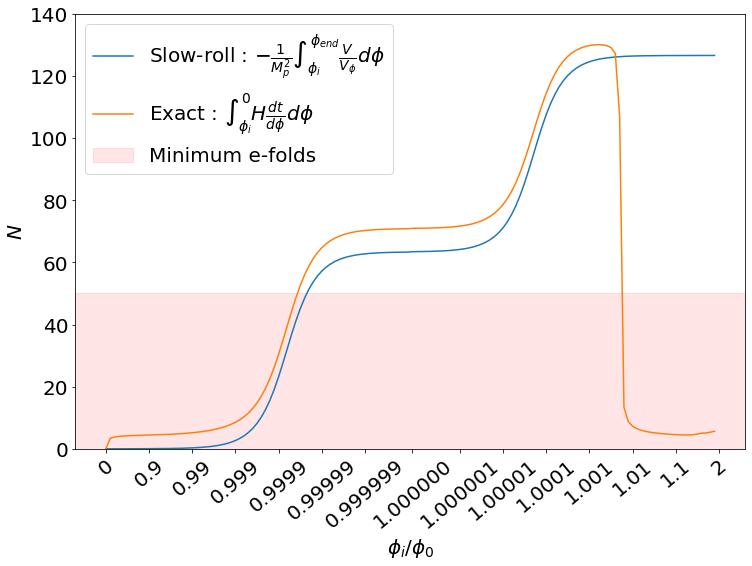

In [23]:
plt.figure()

def efold_primitive(x,alpha,phi0):
    aplus=-alpha+mp.sqrt((alpha**2-alpha)*mp.mpc('1','0'))
    aminus=-alpha-mp.sqrt((alpha**2-alpha)*mp.mpc('1','0'))
    bplus=mp.mpf('2')*(aplus+alpha/mp.mpf('3'))/(aplus-aminus)
    bminus=mp.mpf('2')*(aminus+alpha/mp.mpf('3'))/(aminus-aplus)
    return phi0**2*(mp.re(x**2/20+bplus/(10*mp.sqrt(aplus))*mp.atan(mp.sqrt(aplus)*x**2)+bminus/(10*mp.sqrt(aminus))*mp.atan(mp.sqrt(aminus)*x**2)))
y_list_SR = []

alpha = A6**2/(40*mphi**2)
for x in x_list_sym:
    y_list_SR.append(efold_primitive(x,alpha,phi0/Mp))
x_symlogx = np.concatenate((np.arange(-72,-1,1), np.arange(1,72,1)))
x_symlogx = np.arange(0,142,1)
plt.plot(x_symlogx,y_list_SR, label=r'Slow-roll : $-\frac{1}{M_p^2}\int_{\phi_i}^{\phi_{end}}\frac{V}{V_\phi}d\phi$')
plt.plot(x_symlogx, y_list_sym, label=r'Exact : $\int_{\phi_i}^{0}H\frac{dt}{d\phi}d\phi$')
plt.axhspan(efold_primitive(0.9999782129701502690830098857594210392832231768776, alpha, phi0/Mp),0, color='red', alpha=0.1, label='Minimum e-folds')
plt.xlabel(r'$\phi_i/\phi_0$')
plt.ylabel(r'$N$')
plt.legend(fontsize = 20)
plt.ylim(0,140)
plt.xticks([0,10,20,30,40,50,60,71,82,92,102,112,122,132,142],[1-1,1-1e-1,1-1e-2,1-1e-3,1-1e-4,1-1e-5,1-1e-6,'1.000000',1+1e-6,1+1e-5,1+1e-4,1+1e-3,1+1e-2,1+1e-1,1+1],rotation=40)  # Set label locations.
define_plot_resolution()


